In [1]:
from logo_maker import detect_words_width, place_the_letters, \
    place_the_atoms, write_lammps_data

Coordinates:   0%|          | 0/2 [00:00<?, ?it/s]

Words width detected


Coordinates:   0%|          | 0/2 [00:00<?, ?it/s]

Letters placed in space


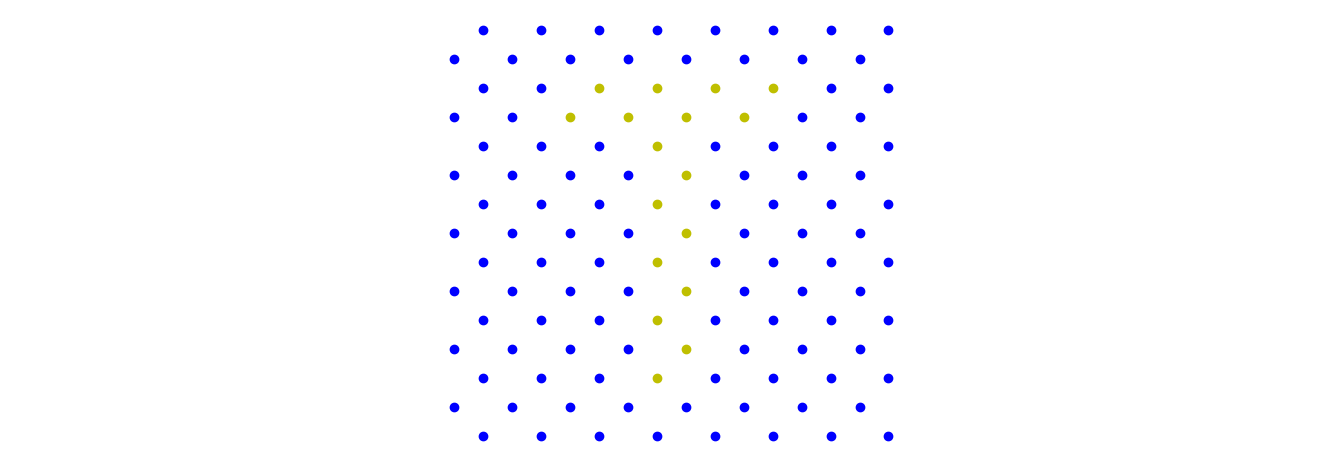

In [10]:
words = ['T_']
width_words = detect_words_width(words, verbose=True)
all_letters, Lx, Ly = place_the_letters(words, width_words, space_letter_x = 280,
                      space_letter_y = 120, space_box_y = 130, verbose=True, show=False)
atoms, Lx_rescaled, Ly_rescaled = place_the_atoms(all_letters, Lx, Ly, show = True,
                                random_placement = False, d0 = 130)
write_lammps_data("logo.data", atoms, Lx_rescaled, Ly_rescaled)

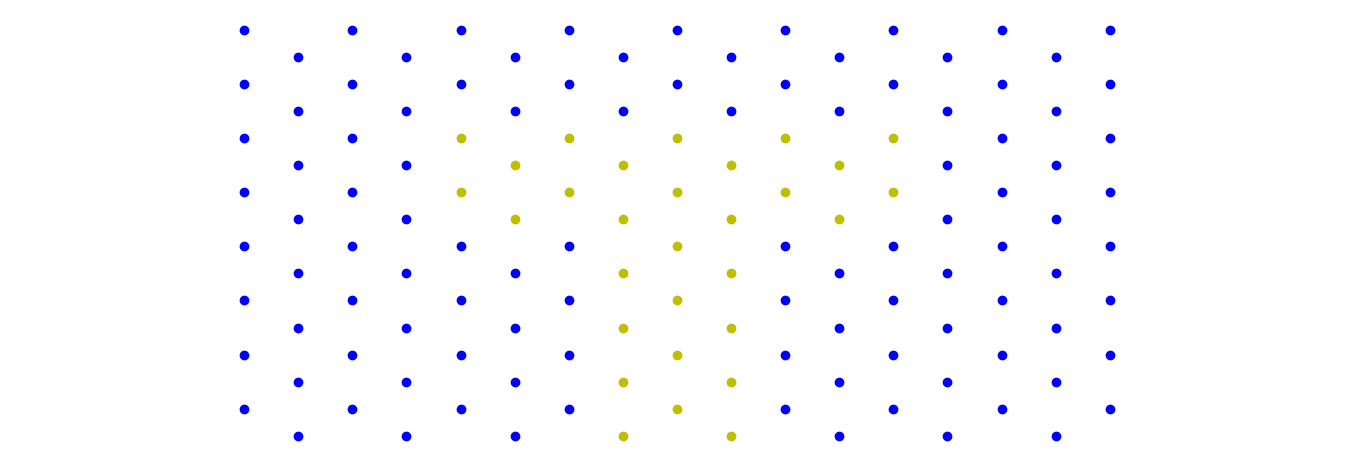

In [29]:
from matplotlib import pyplot as plt
import numpy as np
from numpy.linalg import norm

rescaling = 4.5
d0 = 60
box = np.array([Lx, Ly])
atoms = []

cpt_atoms = 0

shift_y = 0

x = - Lx/2    

while x < Lx/2:

    if shift_y % 2 == 0:
        y = d0/2
    else:
        y = 0

    while y < Ly/2:
        cpt_atoms += 1
        d = np.min(norm(np.remainder(all_letters.T - np.array([x,y]) + box/2., box) - box/2., axis=1))
        if d < 12:
            atoms.append([cpt_atoms, 1, x/rescaling, y/rescaling, 0])
        else:
            atoms.append([cpt_atoms, 2, x/rescaling, y/rescaling, 0])
        y += d0
    x += d0

    shift_y += 1
    
atoms =  np.array(atoms)

fig, ax = plt.subplots(figsize=(14,5))
ax.plot(atoms[atoms.T[1] == 2].T[2],
        atoms[atoms.T[1] == 2].T[3], 'o', color="b")
ax.plot(atoms[atoms.T[1] == 1].T[2],
        atoms[atoms.T[1] == 1].T[3], 'o', color="y")
ax.axis('equal')
fig.tight_layout()
plt.axis('off')
plt.show()

In [ ]:
    if shift_y % 2 == 0:
        y = -Ly/2+d0/2
        shifted_x = x + d0/2
    else:
        y = -Ly/2
        shifted_x = x - d0/2